In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import scipy.stats as st
import pandas as pd

# Study data files
airport_weather_path = "../data/LosAngeles2014-2019annual.csv"

# Read the mouse data and the study results
airport_weather = pd.read_csv(airport_weather_path)

# Combine the data into a single dataset
airport_weather_data_df = pd.DataFrame(airport_weather)

# Display the data table for preview
airport_weather_data_df.head(50)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,CDSD,CLDD,DP01,...,HTDD,PRCP,SNOW,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
0,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2014,6.9,1125,1125,23,...,809,8.30,NaN,66.0,72.9,59.1,270,270,36.9,44.1
1,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2015,6.9,1183,1183,29,...,872,5.96,NaN,65.6,72.7,58.4,270,270,36.9,40.9
2,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2016,7.4,901,901,38,...,1025,10.30,NaN,64.8,71.9,57.8,260,260,46.1,53.0
3,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2017,7.4,994,994,36,...,1079,12.28,NaN,65.1,72.4,57.8,270,110,36.0,45.0
4,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2018,7.4,1019,1019,25,...,843,7.80,NaN,65.2,72.2,58.3,260,270,36.9,44.1
5,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2019,7.6,841,841,46,...,1148,18.73,NaN,64.0,70.8,57.1,270,320,38.0,51.0


In [2]:
airport_weather_data_df['DSND'] = airport_weather_data_df['DSND'].fillna(0)
airport_weather_data_df['DSNW'] = airport_weather_data_df['DSNW'].fillna(0)
airport_weather_data_df['EMSD'] = airport_weather_data_df['EMSD'].fillna(0)
airport_weather_data_df['EMSN'] = airport_weather_data_df['EMSN'].fillna(0)
airport_weather_data_df['SNOW'] = airport_weather_data_df['SNOW'].fillna(0)
#airport_weather_data_df['WT03'] = airport_weather_data_df['WT03'].fillna(0)
#airport_weather_data_df['WT04'] = airport_weather_data_df['WT04'].fillna(0)
#airport_weather_data_df['WT05'] = airport_weather_data_df['WT05'].fillna(0)
#airport_weather_data_df['WT06'] = airport_weather_data_df['WT06'].fillna(0)
#airport_weather_data_df['WT08'] = airport_weather_data_df['WT08'].fillna(0)
#airport_weather_data_df['WT09'] = airport_weather_data_df['WT09'].fillna(0)

airport_weather_data_df.head(50)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,CDSD,CLDD,DP01,...,HTDD,PRCP,SNOW,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
0,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2014,6.9,1125,1125,23,...,809,8.30,0.0,66.0,72.9,59.1,270,270,36.9,44.1
1,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2015,6.9,1183,1183,29,...,872,5.96,0.0,65.6,72.7,58.4,270,270,36.9,40.9
2,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2016,7.4,901,901,38,...,1025,10.30,0.0,64.8,71.9,57.8,260,260,46.1,53.0
3,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2017,7.4,994,994,36,...,1079,12.28,0.0,65.1,72.4,57.8,270,110,36.0,45.0
4,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2018,7.4,1019,1019,25,...,843,7.80,0.0,65.2,72.2,58.3,260,270,36.9,44.1
5,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2019,7.6,841,841,46,...,1148,18.73,0.0,64.0,70.8,57.1,270,320,38.0,51.0


In [3]:
airport_weather_data_df = airport_weather_data_df.rename(columns={"AWND" : "Average wind speed",
                                                                  "CDSD" : "Cooling Degree Days (season-to-date)",
                                                                  "CLDD" : "Cooling Degree Days", 
                                                                  "DP01" : "Number of Days with >=0.01 inch", 
                                                                  "DP10" : "Number of Days with >=0.1 inch", 
                                                                  "DSND" : "Number of Days with Snow Depth >= 1 inch", 
                                                                  "DSNW" : "Number of Days with Snowfall >= 1 inch", 
                                                                  "DT00" : "Number of Days with Max Temp <= 0 degrees F", 
                                                                  "DT32" : "Number of Days with Max Temp <= 32 degrees F", 
                                                                  "DX32" : "Number of Days with Max Temp >= 32 degrees F",
                                                                  "DX70" : "Number of Days with Max temp >= 70 degrees F", 
                                                                  "DX90" : "Number of Days with Max temp >= 90 degrees F", 
                                                                  "EMNT" : "Extreme Minimum Temp", 
                                                                  "EMSD" : "Highest Daily Snow Depth", 
                                                                  "EMSN" : "Highest Daily Snowfall", 
                                                                  "EMXP" : "Highest Daily Precipitation", 
                                                                  "EMXT" : "Extreme Maximum Temp", 
                                                                  "HDSD" : "Heating Degree Days (season-to-date)",
                                                                  "HTDD" : "Heating Degree Days",
                                                                  "PRCP" : "Precipitation",
                                                                  "SNOW" : "Snowfall",
                                                                  "TAVG" : "Average Temperature",
                                                                  "TMAX" : "Maximum Temperature", 
                                                                  "TMIN" : "Minimum Temperature",
                                                                  "WDF2" : "Direction of fastest 2-minute wind",
                                                                  "WDF5" : "Direction of fastest 5-minute wind", 
                                                                  "WSF2" : "Fastest 2-minute wind",
                                                                  "WSF5" : "Fastest 5-minute wind"})
#                                                                  "WT01" : "Fog, ice fog, or freezing fog",
#                                                                  "WT02" : "Heavy fog or heaving freezing fog",
#                                                                  "WT03" : "Thunder",
#                                                                  "WT04" : "Ice pellets, sleet, snow pellets, or small hail",
#                                                                  "WT05" : "Hail (may include small hail)",
#                                                                  "WT06" : "Glaze or rime",
#                                                                  "WT08" : "Smoke or haze"})
#                                                                  "WT09" : "Blowing or drifting snow"}) 

In [4]:
airport_weather_data_df.head(50)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,Average wind speed,Cooling Degree Days (season-to-date),Cooling Degree Days,Number of Days with >=0.01 inch,...,Heating Degree Days,Precipitation,Snowfall,Average Temperature,Maximum Temperature,Minimum Temperature,Direction of fastest 2-minute wind,Direction of fastest 5-minute wind,Fastest 2-minute wind,Fastest 5-minute wind
0,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2014,6.9,1125,1125,23,...,809,8.30,0.0,66.0,72.9,59.1,270,270,36.9,44.1
1,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2015,6.9,1183,1183,29,...,872,5.96,0.0,65.6,72.7,58.4,270,270,36.9,40.9
2,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2016,7.4,901,901,38,...,1025,10.30,0.0,64.8,71.9,57.8,260,260,46.1,53.0
3,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2017,7.4,994,994,36,...,1079,12.28,0.0,65.1,72.4,57.8,270,110,36.0,45.0
4,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2018,7.4,1019,1019,25,...,843,7.80,0.0,65.2,72.2,58.3,260,270,36.9,44.1
5,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2019,7.6,841,841,46,...,1148,18.73,0.0,64.0,70.8,57.1,270,320,38.0,51.0


In [5]:
total_crime = [45000, 90000, 150000, 135000, 185000, 145000]
airport_weather_data_df['Total Crimes'] = total_crime
airport_weather_data_df.head(50)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,Average wind speed,Cooling Degree Days (season-to-date),Cooling Degree Days,Number of Days with >=0.01 inch,...,Precipitation,Snowfall,Average Temperature,Maximum Temperature,Minimum Temperature,Direction of fastest 2-minute wind,Direction of fastest 5-minute wind,Fastest 2-minute wind,Fastest 5-minute wind,Total Crimes
0,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2014,6.9,1125,1125,23,...,8.30,0.0,66.0,72.9,59.1,270,270,36.9,44.1,45000
1,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2015,6.9,1183,1183,29,...,5.96,0.0,65.6,72.7,58.4,270,270,36.9,40.9,90000
2,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2016,7.4,901,901,38,...,10.30,0.0,64.8,71.9,57.8,260,260,46.1,53.0,150000
3,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2017,7.4,994,994,36,...,12.28,0.0,65.1,72.4,57.8,270,110,36.0,45.0,135000
4,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2018,7.4,1019,1019,25,...,7.80,0.0,65.2,72.2,58.3,260,270,36.9,44.1,185000
5,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",33.938,-118.3888,29.6,2019,7.6,841,841,46,...,18.73,0.0,64.0,70.8,57.1,270,320,38.0,51.0,145000


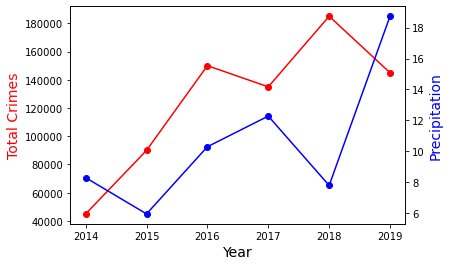

In [6]:
#Step 1 -1st y-axis
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(airport_weather_data_df['DATE'],
        airport_weather_data_df['Total Crimes'], color="red", marker="o")
# set x-axis label
ax.set_xlabel("Year",fontsize=14)
# set y-axis label
ax.set_ylabel("Total Crimes",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(airport_weather_data_df['DATE'],
         airport_weather_data_df['Precipitation'],
         color="blue", marker="o")
ax2.set_ylabel("Precipitation",color="blue",fontsize=14)
plt.show()